![alt text](https://wallpaper-gallery.net/images/cute-starbucks-wallpaper/cute-starbucks-wallpaper-4.jpg)

CORESERA CAPSTONE PROJECT :
===

"STAR RANK"
---

---
---
---

Introduction to Business Problem :
===

In this project we will try to give a "NUTRITION RATING" for the coffes in 'Starbucks',i call it as "THE STAR RANK"

Background :
===


Taking nutritious food is vey important to our health,it also helps us to be fit.There are many number of beniftis by taking a 'coffee' for instance,Two cups of coffee can cut post-workout muscle pain by up to 48%(From the Journal of Pain, March 2007).

Moreover every time we go out for a meeting some one,we might probably endup at a  coffee shope like Starbucks(mostly in-case of dates).Since Starbucks is the most popular in it's kind we focus on the coffees by it.
                                      
So, we will try to determine the nutrition rank of the coffees.

Why do we need to Solve?
===

If we could figure out a way to measure how nutritious a coffee is,then it would be very useful for the coustemers as this could let them know about what they were taking.Also the cooks who prepares the new kind of coffee will have a better scope of evaluating their creation.

Target audiences :
===

>__coustomers__ :        Esspecialy those who are in a diet.

>__cooks__ :                 Gives a better scope of evaluating their creation.

>__stake holders__ :     This allows them to set prices according to the nutrition rank.

Data Source :
==

>FOURSQUARE : for location of venues.

>KAGGLE DATASETS : for the chemical values & Menu


Data & Feature explanation :
===

We gonna extract and merge the data of location and the data of the chemical values of all of the coffees made by Starbucks and then we form a dataframe of the NULL values droped.Then we gonna visualize each of the feature impact if not necessary we will drop it..
                            However features like location & the levels of chemicals will be features.
            
>Data source :  Foresquare API


Methodology :
===
I'm gonna use K-means ML algorithm for this project since it has outstanded every other algorithms related to CLUSTERING,i.e Data Segmentation.Now we gonna use K-means algorithm to form 5 clusters in the taken dataset.Then we will recurrsively train the model with all the datapoints by again taking k as 5,till we encounter the centeroids of the clusters.  At the end every coffe will have a "NUTRITION RATING"on them.so we've used clustering for the ranking of  the coffees.
                                                   
   >Machine Learning Algorithm : K-means

   >Technique : Recurssion

Example:
==

Consider there are 25 coffees in the dataframe after cleaning.then the dataset is trained by recurssively which form 5 clusters.Then every coffe will be rated with a Star Rank out of 5.

SOURCE CODE OF THE PROJECT :
===

In [548]:
#IMPORTING REQUIRED PACKAGES....

import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
import foursquare
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

import folium # plotting library

from sklearn.cluster import KMeans 

In [549]:
#credentials..

CLIENT_ID = 'PC0W23LXG00OY3H5QOV4S3WZIZG0MQEZUDYZKLB5N00AYX21' # your Foursquare ID
CLIENT_SECRET = 'HU31OWG0NR4TXZF514AM5N2B15HEAJJUYZJFSPHFUM30YDW2' # your Foursquare Secret
VERSION = '20180603'
LIMIT = 30

In [550]:
#Connecting Foursquare API..
client = foursquare.Foursquare(client_id=CLIENT_ID, client_secret=CLIENT_SECRET)
#SEARCH_RESULTS
client.venues('40a55d80f964a52020f31ee3')
results = requests.get(url).json()
results

After converting the retrived data as json file from Foursquare we gonna make a DataFrame of it

In [551]:
df=pd.read_csv(r'C:\Users\vamsi\Desktop\starbucks-2.csv')
df.head()


,Beverage_category,Name,Beverage_prep,Calories,Total_Fat(g),Trans_Fat(g),Saturated_Fat(g),Sodium(mg),Total_Carbohydrates (g),Cholesterol(mg),Dietary Fibre (g),Sugars (g),Protein (g),VitaminA,VitaminC,Calcium,Iron,Caffeine(mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


DATA CLEANING :
==

In [552]:

df=df.replace(['Varies',' ','varies'],np.NaN)

df=df.dropna()


In [553]:
#CONVERT THE PERCETNAGES TO INTEGERS..
def percentage_to_value(x):
    str(x)
    if x== "0%" :
        return 0
    if x== "2%" :
        return 2
    if x== "4%" :
        return 4
    if x== "6%" :
        return 6
    if x== "8%" :
        return 8
    if x== "10%" :
        return 10
    if x== "15%" :
        return 15
    if x== "20%" :
        return 20
    if x== "25%" :
        return 25
    if x== "30%" :
        return 30
    if x== "35%" :
        return 35
    if x== "40%" :
        return 40
    if x== "45%" :
        return 45
    if x== "50%" :
        return 50
    if x== "60%" :
        return 60
    if x== "100%" :
        return 100



In [554]:
df.columns

Index(['Beverage_category', 'Name', 'Beverage_prep', 'Calories',
       'Total_Fat(g)', 'Trans_Fat(g) ', 'Saturated_Fat(g)', 'Sodium(mg)',
       'Total_Carbohydrates (g) ', 'Cholesterol(mg)', 'Dietary Fibre (g)',
       'Sugars (g)', 'Protein (g) ', 'VitaminA', 'VitaminC', 'Calcium ',
       'Iron ', 'Caffeine(mg)'],
      dtype='object')

In [555]:
df['VitaminA']=df['VitaminA'].apply(percentage_to_value)
df['VitaminC']=df['VitaminC'].apply(percentage_to_value)
df['Calcium ']=df['Calcium '].apply(percentage_to_value)
df['Iron ']=df['Iron '].apply(percentage_to_value)

In [556]:
df.head()

,Beverage_category,Name,Beverage_prep,Calories,Total_Fat(g),Trans_Fat(g),Saturated_Fat(g),Sodium(mg),Total_Carbohydrates (g),Cholesterol(mg),Dietary Fibre (g),Sugars (g),Protein (g),VitaminA,VitaminC,Calcium,Iron,Caffeine(mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0,0.0,0,0,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0,0.0,0,0,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0,0.0,0,0,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0,0.0,2,0,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10,0.0,20,0,75


In [557]:
df.describe()

,Calories,Trans_Fat(g),Saturated_Fat(g),Sodium(mg),Total_Carbohydrates (g),Cholesterol(mg),Dietary Fibre (g),Sugars (g),Protein (g),VitaminA,VitaminC,Calcium,Iron
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,216.000000,219.000000,219.000000
mean,201.584475,1.394977,0.039269,6.643836,137.374429,37.296804,0.844749,34.077626,7.294521,10.292237,2.699074,21.675799,8.050228
std,102.353614,1.685154,0.073018,8.832857,80.605714,20.926664,1.441077,19.971043,4.790546,8.200833,12.127892,14.525205,10.773406
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,125.000000,0.100000,0.000000,0.000000,80.000000,21.000000,0.000000,19.000000,4.000000,4.000000,0.000000,10.000000,0.000000
50%,190.000000,0.500000,0.000000,5.000000,130.000000,36.000000,0.000000,33.000000,6.000000,8.000000,0.000000,20.000000,4.000000
75%,270.000000,2.000000,0.100000,10.000000,180.000000,53.000000,1.000000,44.000000,10.000000,15.000000,0.000000,30.000000,10.000000
max,510.000000,9.000000,0.300000,40.000000,340.000000,90.000000,8.000000,84.000000,20.000000,50.000000,100.000000,60.000000,50.000000


Combine the Name & Beverage_prep to form an id number for the coffes..
===

In [558]:
df['id']=df.Name+df.Beverage_prep
df.id.head()

0              Brewed CoffeeShort
1               Brewed CoffeeTall
2             Brewed CoffeeGrande
3              Brewed CoffeeVenti
4    Caffè LatteShort Nonfat Milk
Name: id, dtype: object

In [559]:
df['id_num']=df.id.index
df.id_num

0        0
1        1
2        2
3        3
4        4
5        5
6        6
7        7
8        8
9        9
10      10
11      11
12      12
13      13
14      14
15      15
16      16
17      17
18      18
19      19
20      20
21      21
22      22
23      23
24      24
25      25
26      26
27      27
28      28
29      29
      ... 
212    212
213    213
214    214
215    215
216    216
217    217
218    218
219    219
220    220
221    221
222    222
223    223
224    224
225    225
226    226
227    227
228    228
229    229
230    230
231    231
232    232
233    233
234    234
235    235
236    236
237    237
238    238
239    239
240    240
241    241
Name: id_num, Length: 219, dtype: int64

In [560]:
df.head()

,Beverage_category,Name,Beverage_prep,Calories,Total_Fat(g),Trans_Fat(g),Saturated_Fat(g),Sodium(mg),Total_Carbohydrates (g),Cholesterol(mg),Dietary Fibre (g),Sugars (g),Protein (g),VitaminA,VitaminC,Calcium,Iron,Caffeine(mg),id,id_num
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0,0.0,0,0,175,Brewed CoffeeShort,0
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0,0.0,0,0,260,Brewed CoffeeTall,1
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0,0.0,0,0,330,Brewed CoffeeGrande,2
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0,0.0,2,0,410,Brewed CoffeeVenti,3
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10,0.0,20,0,75,Caffè LatteShort Nonfat Milk,4


FREATURE SELECTION :
=== 
                                                                            

We can select all the colunms of the above dataframe as our model features which infulences the pridiction of the Star Rank

In [561]:
df.describe().columns

Index(['Calories', 'Trans_Fat(g) ', 'Saturated_Fat(g)', 'Sodium(mg)',
       'Total_Carbohydrates (g) ', 'Cholesterol(mg)', 'Dietary Fibre (g)',
       'Sugars (g)', 'Protein (g) ', 'VitaminA', 'VitaminC', 'Calcium ',
       'Iron ', 'id_num'],
      dtype='object')

In [562]:
df['Caffeine(mg)']=df['Caffeine(mg)'].astype(int)
x=np.array(df[['Calories', 'Trans_Fat(g) ', 'Saturated_Fat(g)', 'Sodium(mg)',
       'Total_Carbohydrates (g) ', 'Cholesterol(mg)', 'Dietary Fibre (g)',
       'Sugars (g)', 'Protein (g) ', 'VitaminA', 'VitaminC', 'Calcium ',
       'Iron ','Caffeine(mg)']])
x = np.nan_to_num(x)
x[1]

array([  4. ,   0. ,   0. ,   0. ,  10. ,   0. ,   0. ,   0. ,   0.5,
         0. ,   0. ,   0. ,   0. , 260. ])

MODELING :
==

In [563]:
from sklearn.preprocessing import StandardScaler
#NORMALIZENG
#train=StandardScaler().fit_transform(x)
#train

In [564]:
k=5
ML=KMeans(k)
ML.fit(x)
labels =ML.labels_
k_means_cluster_centers=ML.cluster_centers_
print(labels)

[0 0 0 0 2 2 2 2 2 2 4 4 4 4 4 4 2 2 2 2 4 2 4 4 4 4 1 4 2 2 2 2 4 2 4 4 4
 4 1 4 2 0 0 0 2 2 2 2 2 2 2 2 2 2 4 2 2 0 2 2 4 4 2 2 2 2 4 2 4 4 4 4 4 4
 4 4 4 4 1 3 1 1 1 1 1 1 2 2 2 3 3 3 3 3 3 3 1 3 2 3 3 3 2 2 2 2 2 2 4 4 4
 4 4 4 2 2 2 3 3 3 3 1 3 1 1 1 2 2 2 2 2 2 2 3 2 3 3 3 2 0 0 2 2 2 2 2 2 4
 2 0 3 3 3 3 3 3 3 3 3 4 4 4 4 4 1 1 1 4 4 4 4 1 4 1 1 1 4 4 4 1 1 4 1 1 1
 4 4 4 1 1 1 1 1 1 2 4 4 2 4 4 2 4 4 4 4 1 3 3 3 3 3 3 1 1 1 3 3 3 3]


---
Exploratory Data Analysis & Inferential Statistical Testing:
===

[[ 3.24545455e+01 -2.22044605e-16 -6.93889390e-18 -8.88178420e-16
   7.81818182e+00  7.09090909e+00  2.22044605e-16  6.09090909e+00
   6.81818182e-01  1.77635684e-15  0.00000000e+00  7.27272727e-01
   5.45454545e-01  2.33636364e+02]
 [ 3.59166667e+02  3.36666667e+00  8.05555556e-02  1.16666667e+01
   2.60555556e+02  6.85277778e+01  1.05555556e+00  6.48888889e+01
   9.41666667e+00  1.21944444e+01  3.36111111e+00  2.91666667e+01
   1.27777778e+01  1.15277778e+02]
 [ 1.12352941e+02  6.27941176e-01  2.20588235e-02  4.41176471e+00
   7.23382353e+01  1.89558824e+01  3.67647059e-01  1.71764706e+01
   5.36764706e+00  8.00000000e+00  2.05882353e-01  1.73088235e+01
   4.45588235e+00  6.98529412e+01]
 [ 2.44250000e+02  1.14750000e+00  3.25000000e-02  5.75000000e+00
   1.32875000e+02  4.74500000e+01  2.10000000e+00  4.13750000e+01
   9.30000000e+00  1.28500000e+01  1.07500000e+01  2.21250000e+01
   1.16250000e+01  1.60000000e+01]
 [ 2.10156250e+02  1.49531250e+00  4.53125000e-02  7.89062500e+00
  

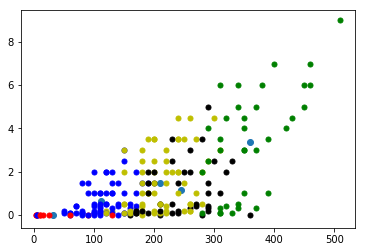

In [565]:
#DATA_VISUALIZATION
centers=ML.cluster_centers_
labels=ML.labels_
colors=['r.','g.','b.','k.','y.']
print(centers)
print(labels)

for i in range(len(x)):
    plt.plot(x[i][0],x[i][1],colors[labels[i]],markersize=10)
     

plt.scatter(centers[:,0],centers[:,1])

The data can be visualized by the graph and the below tabel


Result :
===

__Here we observe that the 0th labeled cluster/coffees are "The most nutrisious",i.e they'll be awarded with 5/5 Star Rank rating.__

Then comes 2'nd labeled cluster/coffees are The best coffees with lowest "caffine" content in them,hence they are awarded with __4/5 Star Rank rating__.

The __3/5 Star Rank rating__ can be give to The 3'rd labeled cluster/coffees which are "rich in Carbohydrates"

The __2/5 Star Rank rating__ can be give to The 1'st labeled cluster/coffees which are for mostly "new" coustemers..

The __1/5 Star Rank rating__ can be give to The 4'th labeled cluster/coffees which are for those who are in "need of Caffeine" which is not recommendble for a good health..




                

In [566]:
df["Labels"] = labels
df.head(5)
df.groupby('Labels').mean()

,Calories,Trans_Fat(g),Saturated_Fat(g),Sodium(mg),Total_Carbohydrates (g),Cholesterol(mg),Dietary Fibre (g),Sugars (g),Protein (g),VitaminA,VitaminC,Calcium,Iron,Caffeine(mg),id_num
Labels,,,,,,,,,,,,,,,
0,32.454545,0.000000,0.000000,0.000000,7.818182,7.090909,0.000000,6.090909,0.681818,0.000000,0.000000,0.727273,0.545455,233.636364,60.545455
1,359.166667,3.366667,0.080556,11.666667,260.555556,68.527778,1.055556,64.888889,9.416667,12.194444,3.361111,29.166667,12.777778,115.277778,161.972222
2,112.352941,0.627941,0.022059,4.411765,72.338235,18.955882,0.367647,17.176471,5.367647,8.000000,0.205882,17.308824,4.455882,69.852941,85.705882
3,244.250000,1.147500,0.032500,5.750000,132.875000,47.450000,2.100000,41.375000,9.300000,12.850000,11.621622,22.125000,11.625000,16.000000,157.025000
4,210.156250,1.495313,0.045313,7.890625,162.265625,38.062500,0.593750,34.953125,8.031250,11.828125,0.281250,25.421875,8.265625,117.109375,114.687500


Discussion section :
===

>OBESRVATIONS : Calories,Carbohydrates,Dietary Fibre,Protein,VitaminA,VitaminC,Calcium & Iron are good for health we must preffer a good food which contains these..

>RECOMENDATIONS : Be careful while ploting the scatter plot..!

Conclusion :
===
We have successfuly determined and categorised the coffes based on their Star Rank predicted.i would like to mail the officials of the Starbucks my ranking scheme and the list of thr results Which can be used to implement at any Starbucks shope all around the world.